# E-commerce Marketing and Shopping EDA & Hypothesis testing with Python

### Problem statement:
To conduct a thorough exploratory data analysis (EDA) and hypothesis testing on two comprehensive datasets one containing information on customers visiting the shopping site for purchase and another that has demographic, purchase, and marketing information about the group of people

2 datasets :- 
1. Shopping dataset
2. Campaign Dataset

## 2. Campaign Dataset

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
from scipy.stats import f_oneway,kruskal ,ttest_ind # For Numeric vs Categorical 
from scipy.stats import shapiro  # Test Data is gausian or not
from scipy.stats import levene  # Test variance  
from scipy.stats import chisquare , chi2_contingency # Categorical Vs Categorical 

### A. EDA on various features and columns

In [249]:
data_1 = pd.read_csv("campaign - campaign.csv")
data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,2,11,4,0,0,0,0,0,0,US
2235,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,0,3,8,0,0,0,0,0,0,SP
2236,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,1,5,8,0,0,0,0,0,0,SP
2237,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,4,10,3,0,0,0,0,0,0,IND


In [250]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [251]:
# Checking the count of null values in each column
data_1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Country                0
dtype: int64

In [252]:
data_1.shape

(2239, 27)

In [253]:
# Creating a function to calculate value_counts for all the column mentioned in col_list paramter for data (dataframe)
def unique_value_count(data,col_list):
    for i in col_list:
        print(f'Unique Values of Column {i} :-')
        print(data[i].value_counts(),end='\n\n')
a = ['Education','Marital_Status','Country','Kidhome','Teenhome','Complain']
unique_value_count(data_1,a)

Unique Values of Column Education :-
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Unique Values of Column Marital_Status :-
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Unique Values of Column Country :-
SP     1095
SA      336
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

Unique Values of Column Kidhome :-
0    1293
1     898
2      48
Name: Kidhome, dtype: int64

Unique Values of Column Teenhome :-
0    1157
1    1030
2      52
Name: Teenhome, dtype: int64

Unique Values of Column Complain :-
0    2218
1      21
Name: Complain, dtype: int64



__Observation:__
- There are 2239 rows and 27 columns in the campaign dataset.
- There are no null values in any of the column in dataset.
- Columns : Education,Marital_Status,Income,Dt_Customer,Country  are Object Type columns rest all column are of type int.
- We need to correct the data type of Dt_Customer -should be of datetime format .

__From Seeing Unique Values of column we Observe that :__ 
- Most of the customer education level is Graduation (1126 customers) 
- Most of the Customer location country is SP ( 1095 customers) 
- Top 4 Maritial Status of customers are Married , Together , Single and Divorced
- Most of the customer ( 1293 customers) have 0 children at thier home
- Most of the customer ( 1157 customers) have 0 teenagers at thier home
- Most of the customers (2218 customers)have raised no complain in last 2 years 

### B. Feature engineering

In [254]:
# Changing the data type to DateTime for Dt_Customer column.
data_1['Dt_Customer']= pd.to_datetime(data_1['Dt_Customer'])
data_1['Dt_Customer-Year'] = data_1['Dt_Customer'].dt.year
data_1['Dt_Customer-Month'] = data_1['Dt_Customer'].dt.month

# Income should be of float type ,changing its data type to float
data_1['Income_Currency'] = data_1['Income'].str.get(0)   # Currency column to tell currency Income for the income amoubt
data_1['Income'] = data_1['Income'].str[1:].str.replace(',','').astype('float')

In [255]:
# Creating new column having Total_Spending done (take in account spending in all categories together)
data_1['Total_Spending'] = data_1['MntWines'] + data_1['MntFruits'] + data_1['MntMeatProducts'] + data_1['MntFishProducts'] +data_1['MntSweetProducts']+ data_1['MntGoldProds']

In [256]:
# Null value check
data_1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Country                 0
Dt_Customer-Year        0
Dt_Customer-Month       0
Income_Currency         0
Total_Spending          0
dtype: int64

In [257]:
# Income has null values : As the count null values is 24 ( less) we can either Remove them or replace them with some value.
# Replacing all null values with average Income 
data_1['Income'].fillna(np.mean(data_1['Income']),inplace =True)

In [258]:
data_1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Country                0
Dt_Customer-Year       0
Dt_Customer-Month      0
Income_Currency        0
Total_Spending         0
dtype: int64

In [259]:
data_1.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Dt_Customer-Year,Dt_Customer-Month,Total_Spending
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,51969.861400,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,2013.028138,6.467619,606.041090
std,3246.372471,11.985494,21410.586353,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.684707,3.487460,602.274089
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,5.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,69.000000
50%,5455.000000,1970.000000,51717.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,396.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,1046.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,2525.000000


In [260]:
# Taking bin interval as 20000 for income and creating income bins column
bins_ = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000]
labels_ = ['0 to 20000','20000 to 40000','40000 to 60000','60000 to 80000','80000 to 100000',
           '100000 to 120000','120000 to 140000','140000 to 160000','160000 to 180000' ]
data_1['Income_Bins'] = pd.cut(x=data_1['Income'],bins = bins_ , labels = labels_ )
data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Dt_Customer-Year,Dt_Customer-Month,Income_Currency,Total_Spending,Income_Bins
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,SP,2014,6,$,1190,80000 to 100000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,0,CA,2014,6,$,577,40000 to 60000
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,2014,5,$,251,60000 to 80000
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2014,5,$,11,20000 to 40000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,SP,2014,4,$,91,20000 to 40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,US,2013,3,$,689,60000 to 80000
2235,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,SP,2013,1,$,55,20000 to 40000
2236,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,SP,2012,12,$,309,40000 to 60000
2237,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,IND,2012,11,$,1383,60000 to 80000


In [261]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-nul

### C. Outlier Check and Visualisations  

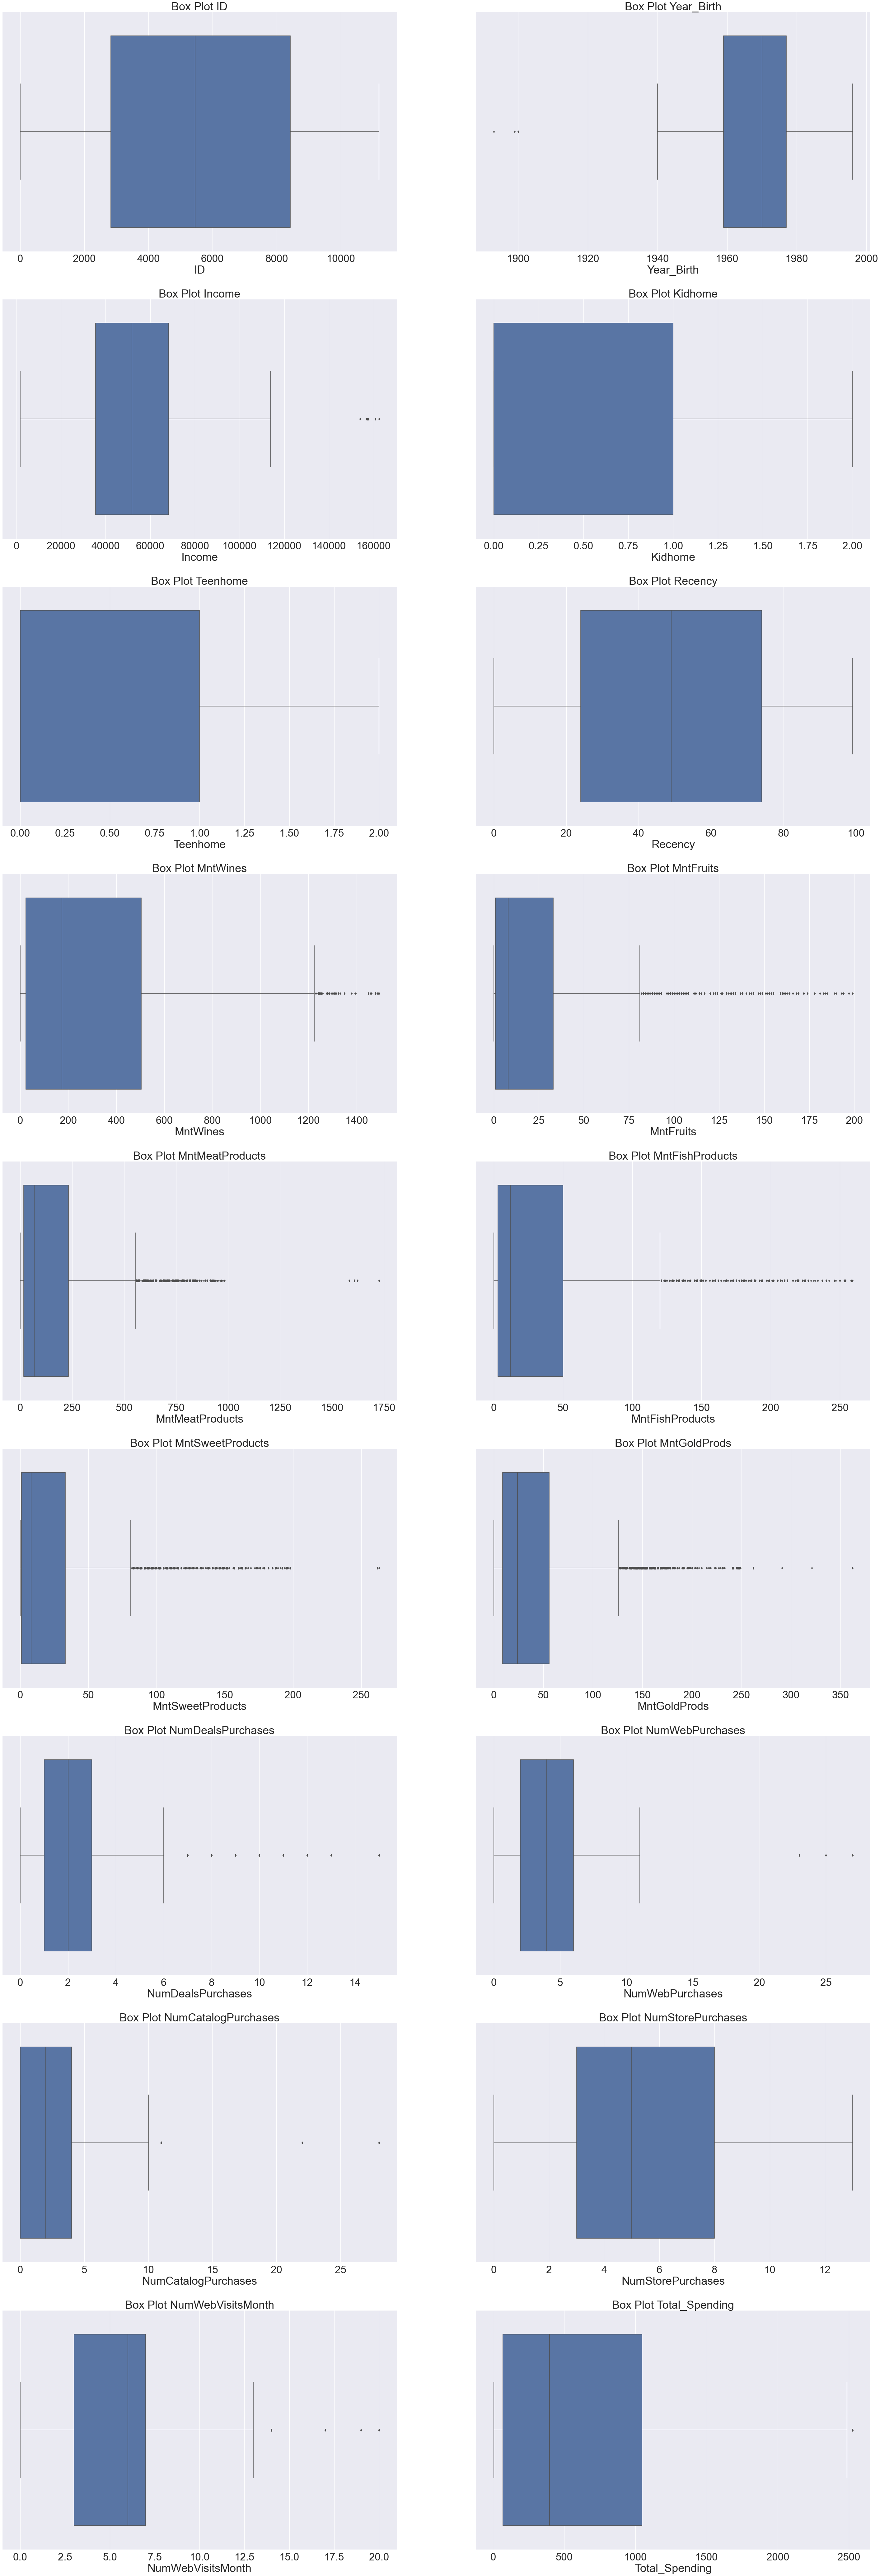

In [262]:
numeric_type = ['int64', 'float64']
cols_ = data_1.select_dtypes(include=numeric_type).columns

cols_skip = ('Dt_Customer-Year','Dt_Customer-Month','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain')

fig, axis = plt.subplots(nrows=9, ncols=2, figsize=(50, 150))
i = 0
j = 0
sns.set(font_scale=3)
for col_name in cols_ :
    if col_name in cols_skip:
        continue
    sns.boxplot(x=data_1[col_name],ax=axis[i,j])
    axis[i,j].set_title('Box Plot '+col_name)
    if j != 1:
        j+=1 
    else:
        j = 0
        i+= 1
plt.show()

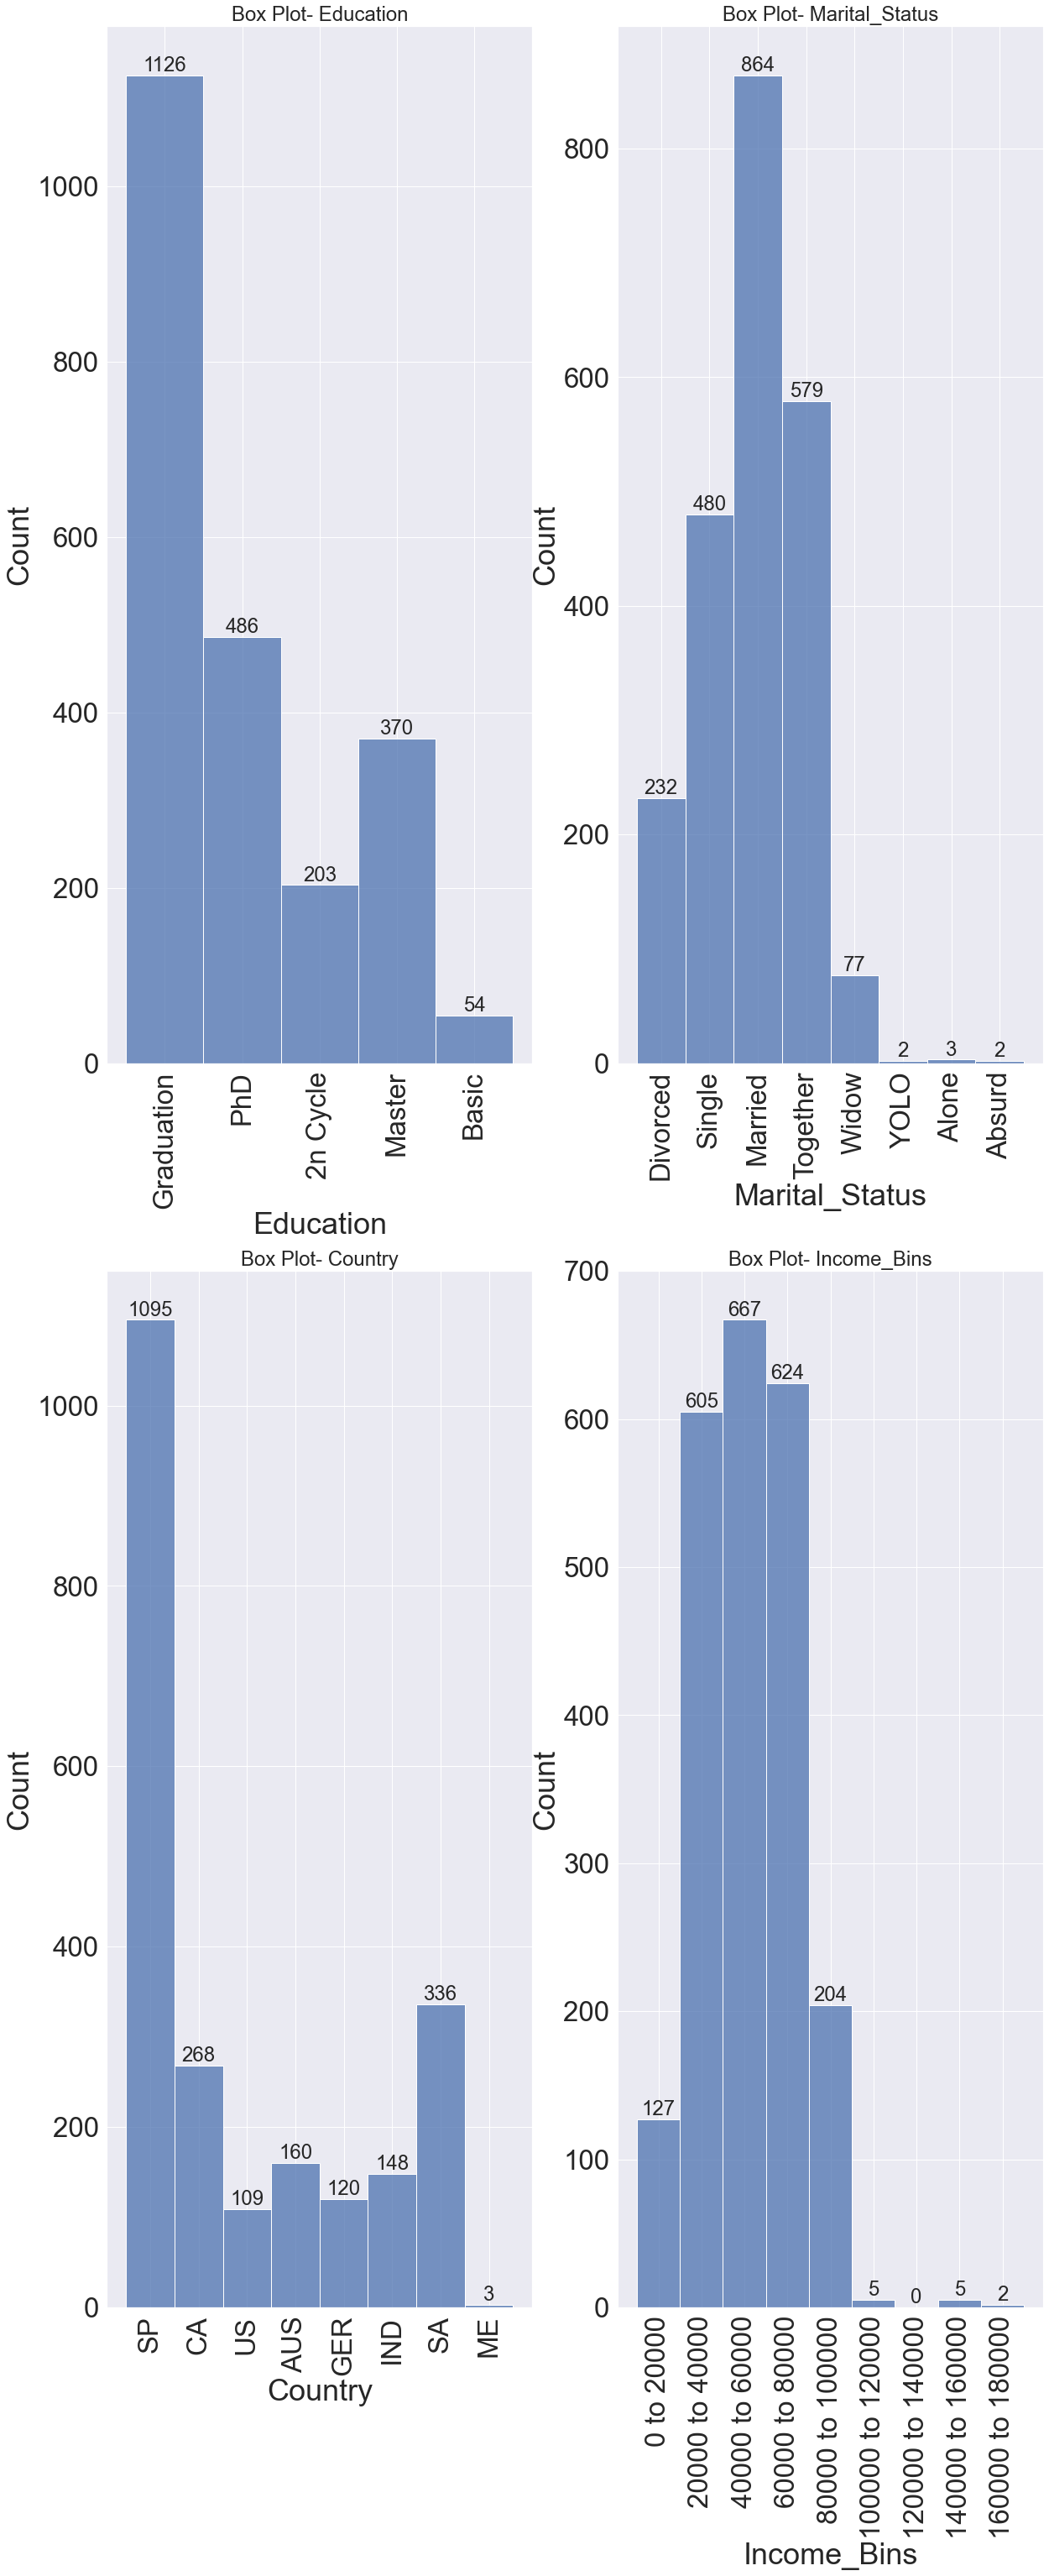

In [263]:
numeric_type = ['object','category']
cols_ = data_1.select_dtypes(include=numeric_type).columns
cols_skip = ('Income_Currency')

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 50))
i = 0
j = 0
sns.set(font_scale=2)
for col_name in cols_ :
    if col_name in cols_skip:
        continue
    ax_ = sns.histplot(x=data_1[col_name],ax=axis[i,j])
    axis[i,j].set_title('Box Plot- '+col_name)
    for k in axis[i,j].containers:
        axis[i,j].bar_label(k)
        
    axis[i,j].tick_params(labelrotation=90,axis='x')
    
    if j != 1:
        j+=1 
    else:
        j = 0
        i+= 1
plt.show()

### D. Hypothesis testing

In [264]:
data_1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Dt_Customer-Year,Dt_Customer-Month,Income_Currency,Total_Spending,Income_Bins
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,SP,2014,6,$,1190,80000 to 100000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,0,CA,2014,6,$,577,40000 to 60000
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,2014,5,$,251,60000 to 80000
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2014,5,$,11,20000 to 40000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,SP,2014,4,$,91,20000 to 40000


###  1. Is income of customers dependent on their education ?

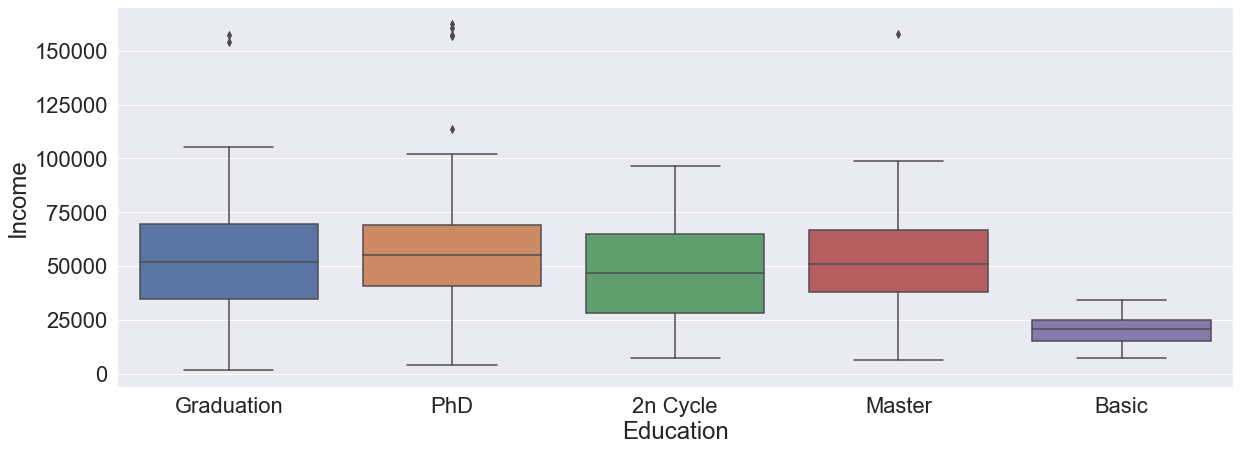

In [265]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data_1 ,x ='Education',y='Income')
plt.show()

In [266]:
data_1['Education'].value_counts()

Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

__Null Hypothesis ,H0   : All Education Groups have same Income mean__

__Alternate Hypothesis , Ha : One or more Education groups have difference Income mean__ 

__Let Alpha be 0.05__

- As we have 5 Education Groups Income to compare so we use ANOVA Test or Kruskal Test 
- To use ANOVA Test pre-requiste is Data should be Gaussian (Shapiro Test) and Data should have equal variance in each group (Levene Test)

In [267]:
Income_Graduation = data_1.loc[data_1['Education'] == "Graduation",'Income']
Income_PhD        = data_1.loc[data_1['Education'] == "PhD",'Income']
Income_Master     = data_1.loc[data_1['Education'] == "Master",'Income']
Income_2nCycle      = data_1.loc[data_1['Education'] == "2n Cycle",'Income']
Income_Basic     = data_1.loc[data_1['Education'] == "Basic",'Income']

In [268]:
# Shapiro Test to check if Data is Gausian or not
# H0 : data is gausian 
# Ha : data is not gausian 

print(shapiro(Income_Graduation))
print(shapiro(Income_PhD))
print(shapiro(Income_Master))
print(shapiro(Income_2nCycle))
print(shapiro(Income_Basic))

ShapiroResult(statistic=0.9781390428543091, pvalue=5.309626870120265e-12)
ShapiroResult(statistic=0.9427410364151001, pvalue=9.590111907722965e-13)
ShapiroResult(statistic=0.9784426093101501, pvalue=2.488290920155123e-05)
ShapiroResult(statistic=0.970100462436676, pvalue=0.0002574709360487759)
ShapiroResult(statistic=0.9706543684005737, pvalue=0.20597457885742188)


In [269]:
# Shapiro Test : As for most of the datasets p < 0.05 so we reject H0 ,Hence data is not Gausian for 
# Income_Graduation , Income_PhD, Income_Master, Income_2nCycle.

In [270]:
# Levene Test to check if variance are queal or not 
# H0 : variance are equal in each group
# Ha : variance are not equal  

levene(Income_Graduation,Income_PhD,Income_Master,Income_2nCycle,Income_Basic)

LeveneResult(statistic=17.855416616121733, pvalue=1.928594481329233e-14)

In [271]:
# Levene Test : As p < 0.05 so we reject H0 ,Hence variance are not equal in each group.

In [272]:
# H0   : All Education Groups have same Income mean
# Ha : One or more Education groups have difference Income mean

# Anova Test
f_oneway(Income_Graduation,Income_PhD,Income_Master,Income_2nCycle,Income_Basic)

F_onewayResult(statistic=38.71853614901425, pvalue=2.2377517228569992e-31)

__Note:__
- As Shapiro Test and Leven Test Result failed so we cannot use ANOVA Test , hence we will use Kruskal Test

In [273]:
# H0   : All Education Groups have same Income mean
# Ha : One or more Education groups have difference Income mean

# Kruskal Test
kruskal(Income_Graduation,Income_PhD,Income_Master,Income_2nCycle,Income_Basic)

KruskalResult(statistic=142.53304421968394, pvalue=8.096174454524849e-30)

#### Observation :
__From Kruskal test as p < 0.05 so we reject H0 (Null Hypothesis) . Hence One or more Education groups have difference Income mean .so we cna say income of customers dependent on their education seeing result of Kruskal Test and Box Plot diagram Income Vs Education.__

### 2. Do higher income people spend more (taking in account spending in all categories together)

In [274]:
data_1.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Dt_Customer-Year,Dt_Customer-Month,Total_Spending
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,51969.861400,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,2013.028138,6.467619,606.041090
std,3246.372471,11.985494,21410.586353,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.684707,3.487460,602.274089
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,5.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,69.000000
50%,5455.000000,1970.000000,51717.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,396.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,1046.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,2525.000000


In [275]:
# So considering 3 main groups Low income (0 to 20000) , Mediumn Income (20000 to 50000) and High Income(50000 or more) 
# customers.

Low_Income_Spend = data_1.loc[data_1['Income'] < 20000,'Total_Spending']
Medium_Income_Spend = data_1.loc[ (data_1['Income'] >= 20000) & (data_1['Income'] < 50000) ,'Total_Spending']
High_Income_Spend = data_1.loc[data_1['Income'] >= 50000,'Total_Spending']

In [276]:
Low_Income_Spend.shape

(127,)

In [277]:
Medium_Income_Spend.shape

(933,)

In [278]:
High_Income_Spend.shape

(1179,)

In [279]:
# Levene Test to check if variance are queal or not 
# H0 : variance are equal in each group
# Ha : variance are not equal  

levene(Low_Income_Spend,Medium_Income_Spend,High_Income_Spend)

LeveneResult(statistic=485.25849053383064, pvalue=9.20384108016589e-176)

- In Levene Test p < 0.05 so we reject H0 . Hence variance are not equal in each group
- As Levene test failes so will not go ahead with Anova Test . We will use Kruskal Test

In [280]:
# H0   : All Income Groups Spend have same mean
# Ha : One or more of Income Groups Spend have different mean

# Kruskal Test
kruskal(Low_Income_Spend,Medium_Income_Spend,High_Income_Spend)

KruskalResult(statistic=1325.7488219621275, pvalue=1.3100899529391869e-288)

In [281]:
# In Kruskal test we see that p <0.05 so we reject H0(Null Hypothesis) . 
# Hence it means that one or more of the income groups spend means value is different (not same).

In [282]:
# 1st T-Test 

# H0 : Mean Spend amount of Low Income and Medim Income is same 
# Ha : Mean Spend amount of Low Income Group < Mean Spend amount of Medim Income Group 
ttest_ind(Low_Income_Spend,Medium_Income_Spend,alternative = 'less')


Ttest_indResult(statistic=-4.785893343893406, pvalue=9.719656110656159e-07)

In [283]:
# As p <0.05 so we reject H0 . Hence Mean Spend amount of Low Income Group < Mean Spend amount of Medim Income Group 

In [284]:
# 2nd T-Test 

# H0 : Mean Spend amount of Medium Income and High Income is same 
# Ha : Mean Spend amount of MediumIncome Group < Mean Spend amount of High Income Group 
ttest_ind(Medium_Income_Spend,High_Income_Spend,alternative = 'less')

Ttest_indResult(statistic=-45.890306007193054, pvalue=8.826e-320)

In [285]:
# As p <0.05 so we reject H0 .Accept Ha : Mean Spend amount of Medium Income Group < Mean Spend amount of Large Income Group 

#### Observation :
- From 1st t-test we can see that Low Income Group Customers Mean Spend < Medium Income Group Customers Mean Spend 
- From 2nd t-test we can see that Medium Income Group Customers Mean Spend < High Income Group Customers Mean Spend 

### 3. Do couples spend more or less money on wine than people living alone

In [286]:
data_1['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [287]:
alone_set = ('Divorced','Single','Absurd','Widow','YOLO','Alone')
couple_set = ('Married','Together')

couple_Wine_spend = data_1.loc[ data_1['Marital_Status'].isin(couple_set),'MntWines']
alone_Wine_spend = data_1.loc[ data_1['Marital_Status'].isin(alone_set),'MntWines']

In [288]:
couple_Wine_spend.shape

(1443,)

In [289]:
alone_Wine_spend.shape

(796,)

In [290]:
# T-Test 

# H0 : Mean Spend amount on wine same for couple and alone group of customers 
# Ha : Mean Spend amount on wine NOT SAME for couple and alone group of customers 

ttest_ind(couple_Wine_spend,alone_Wine_spend)

Ttest_indResult(statistic=-0.2712259990062464, pvalue=0.7862422428083654)

In [291]:
# As p (0.78) >0.05 so we ACCEPT H0 (null hypothesis) . 
# Hence Mean Spend amount on wine same for couple and alone group of customers 

#### Observation :
- From T-Test we can conclude that Mean Spend amount on wine is same for couple and alone group of customers 

### 4. Are people with lower income are more attracted towards campaign or simply put accept more campaigns

In [292]:
med_ = np.median(data_1['Income'])
max_ = np.max(data_1['Income'])

bins_ = [0,med_,max_]
labels_ = ['Below_Median_Income','Above_Median_Income']
data_1['Income_Bins_2'] = pd.cut(x=data_1['Income'],bins = bins_ , labels = labels_ )
data_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Country,Dt_Customer-Year,Dt_Customer-Month,Income_Currency,Total_Spending,Income_Bins,Income_Bins_2
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,SP,2014,6,$,1190,80000 to 100000,Above_Median_Income
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,0,CA,2014,6,$,577,40000 to 60000,Above_Median_Income
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,2014,5,$,251,60000 to 80000,Above_Median_Income
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,2014,5,$,11,20000 to 40000,Below_Median_Income
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,SP,2014,4,$,91,20000 to 40000,Below_Median_Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,US,2013,3,$,689,60000 to 80000,Above_Median_Income
2235,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,SP,2013,1,$,55,20000 to 40000,Below_Median_Income
2236,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,SP,2012,12,$,309,40000 to 60000,Below_Median_Income
2237,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,IND,2012,11,$,1383,60000 to 80000,Above_Median_Income


In [293]:
# Creating new column AcceptCampaign : 1 if customer have ever accepted any campaign Else 0.
data_1.loc[(data_2['AcceptedCmp1'] == 1) | (data_1['AcceptedCmp2'] == 1) | (data_1['AcceptedCmp3'] == 1) | 
          (data_1['AcceptedCmp4'] == 1) | (data_1['AcceptedCmp5'] == 1),'AcceptCampaign'] = 1 

data_1.loc[(data_1['AcceptedCmp1'] == 0) & (data_1['AcceptedCmp2'] == 0) & (data_1['AcceptedCmp3'] == 0) & 
          (data_1['AcceptedCmp4'] == 0) & (data_1['AcceptedCmp5'] == 0),'AcceptCampaign'] = 0 

In [294]:
data_1['AcceptCampaign'] = data_1['AcceptCampaign'].astype('int')
data_1['AcceptCampaign'].value_counts()

0    1776
1     463
Name: AcceptCampaign, dtype: int64

In [295]:
# Income_Bins_2  VS AcceptCampaign 
# As both are having categorical so we will use Chi-Square Test 

__Chi-Square Test:__

In [296]:
chi_data = pd.crosstab(index = data_1['Income_Bins_2'],columns = data_1['AcceptCampaign'])
chi_data

AcceptCampaign,0,1
Income_Bins_2,,
Below_Median_Income,1002,118
Above_Median_Income,774,345


In [297]:
# H0 : Accepting of Campaign is Independent of Income 
# Ha : Accepting of Campaign is Dependent of Income

chi2_contingency(chi_data)

(139.32899251470027,
 3.7320719296764283e-32,
 1,
 array([[888.39660563, 231.60339437],
        [887.60339437, 231.39660563]]))

In [298]:
# p = 3.7320719296764283e-32
# As p < 0.05 so we reject H0 (null hypothesis) . Hence  Accepting of Campaign is Dependent 
# on Income ( Above_Median_Income and Below_Median_Income).

#### Observation: 
- From CHi-Sqaure Test we conclude that Accepting of Campaign is Dependent on Income ( Above_Median_Income and Below_Median_Income)
- From Cross Tab data we can see that Count of customers accepting campaign (atleast 1) becomes doube as we go from Below_Median_Income to Above_Median_Income customer group. 

In [299]:
data_1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Country,Dt_Customer-Year,Dt_Customer-Month,Income_Currency,Total_Spending,Income_Bins,Income_Bins_2,AcceptCampaign
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,SP,2014,6,$,1190,80000 to 100000,Above_Median_Income,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,0,CA,2014,6,$,577,40000 to 60000,Above_Median_Income,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,US,2014,5,$,251,60000 to 80000,Above_Median_Income,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,AUS,2014,5,$,11,20000 to 40000,Below_Median_Income,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,SP,2014,4,$,91,20000 to 40000,Below_Median_Income,1


### E. Correlation

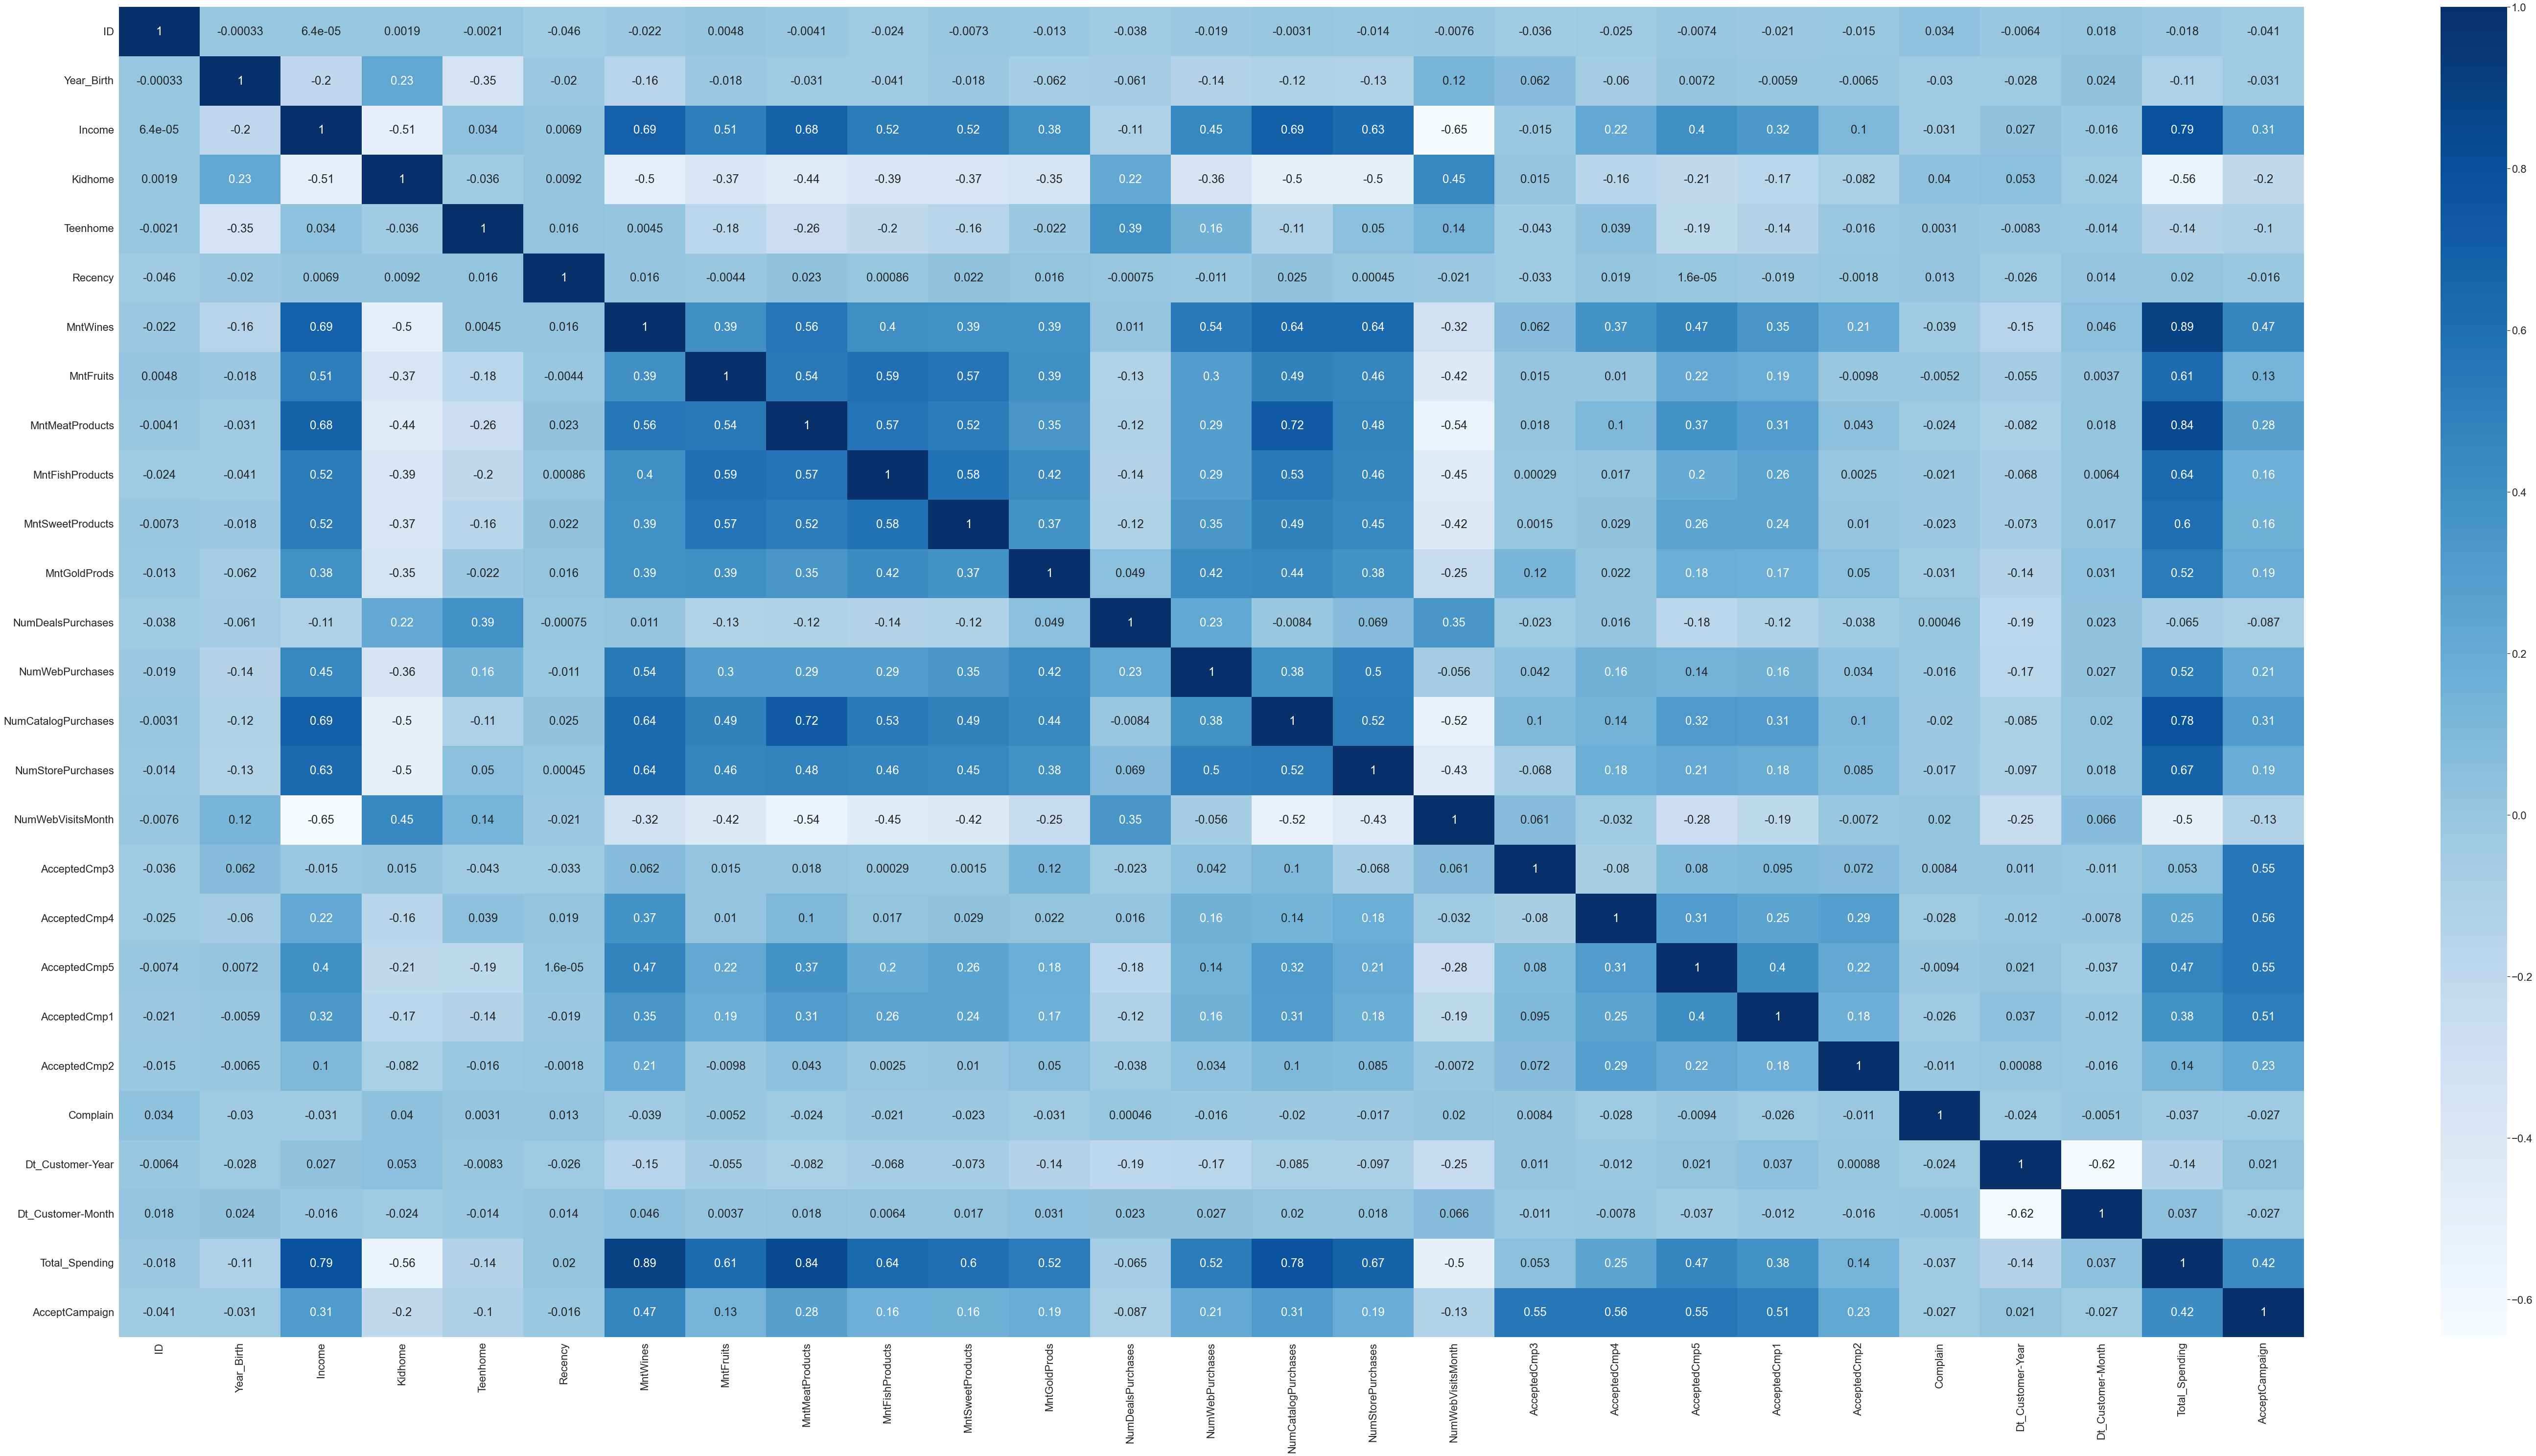

In [300]:
plt.figure(figsize=(100,50))
sns.heatmap(data_1.corr(),cmap='Blues',annot=True)
plt.show()

## Observations and Recommendations :
- There are 2239 rows and 27 columns in the campaign dataset.
- There are no null values in any of the column in dataset.
- Columns : Education,Marital_Status,Income,Dt_Customer,Country  are Object Type columns rest all column are of type int.
- We need to correct the data type of Dt_Customer -should be of datetime format .

__From Seeing Unique Values of column we Observe that :__ 
- Most of the customer education level is Graduation (1126 customers) 
- Most of the Customer location country is SP ( 1095 customers) 
- Top 4 Maritial Status of customers are Married , Together , Single and Divorced
- Most of the customer ( 1293 customers) have 0 children at thier home
- Most of the customer ( 1157 customers) have 0 teenagers at thier home
- Most of the customers (2218 customers) have raised no complain in last 2 years 

__Hypothesis Testing__
- From Kruskal test as p < 0.05 so we reject H0 (Null Hypothesis) . Hence One or more Education groups have difference Income mean .so we can say income of customers dependent on their education seeing result of Kruskal Test and Box Plot diagram Income Vs Education.


-  T-Test : 
1. From 1st t-test we can see that Low Income Group Customers Mean Spend < Medium Income Group Customers Mean Spend
2. From 2nd t-test we can see that Medium Income Group Customers Mean Spend < High Income Group Customers Mean Spend


- From T-Test we can conclude that Mean Spend amount on wine is same for couple and alone group of customers (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')


- From CHi-Sqaure Test we conclude that Accepting of Campaign is Dependent on Income ( Above_Median_Income and Below_Median_Income) . From Cross Tab data we can see that Count of customers accepting campaign (atleast 1) becomes doube as we go from Below_Median_Income to Above_Median_Income customer group.


__Recommendations:__
- As most of the customer have no complain in last 2 years it means the customer service is very good. So shopping site can continue proving same level of customer support (not necessary to invest in imporving customer support for now , instead should solve more important issue)
- Most of the customer buying products having no children or teeneagers at their home which signifies the shopping site has not much range of products for younger age gorups . So introducing new products targeting younger age group can help ttract new customer base.
- Products should be introduced based on different income bracket of users a shopping site has. Only relevent ads should be shown to users like showing expensive prodcuts ads to medium or hight income group users .
